# Project 4
# Crop Yield Prediction using Machine Learning

**Create a ML Model that takes all the above factors in
consideration and give predictions/prescriptions that would help farmers
to increase their crop productivity, and hence gain more profit by being
more productive.**


In [ ]:
#import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# state wise major crop production

crop=pd.read_csv("crop_production.csv")
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# Data Pre-processing


In [20]:
crop.shape

(246091, 7)

In [21]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [22]:
crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [23]:
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [24]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [25]:
crop.dropna(inplace=True) # looking at the data we can drop the null values as they are less in number.

In [26]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [27]:
crop.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


# EDA 

**Overall Crop production by each state**

In [28]:
cr= crop.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
cr

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


In [29]:
df2=pd.read_csv("state_wise_crop_production.csv")
df2

,cvcv,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


# Crop_Recommendation 

In [30]:
# loading the dataset
crop_data=pd.read_csv("cpdata.csv")
crop_data

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [31]:
crop_data.shape

#rows X columns

(3100, 5)

In [32]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [33]:
# dataset columns
crop_data.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [34]:
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,temperature,humidity,ph,rainfall,Crop
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [35]:
# statistical inference of the dataset

crop_data.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [36]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

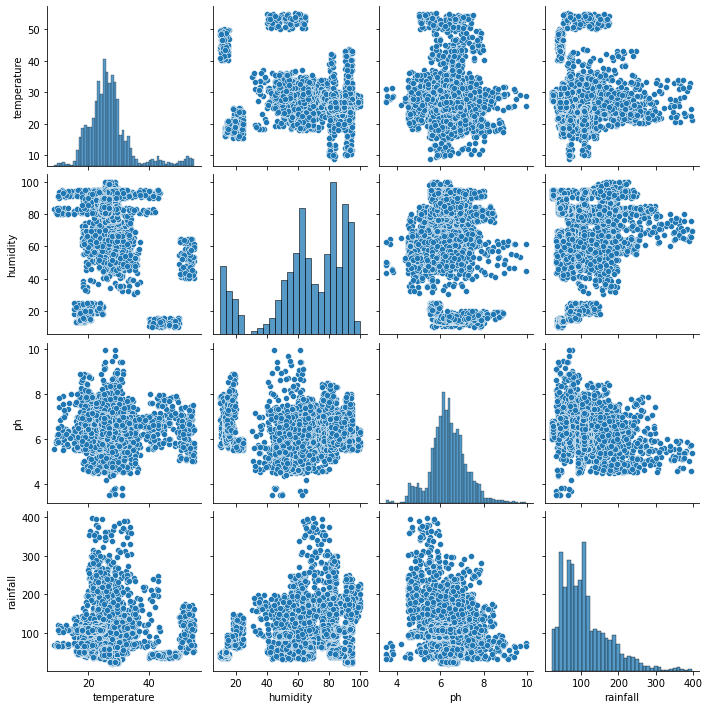

In [37]:
# Visualizing the features

ax = sns.pairplot(crop_data)
ax

In [38]:
crop_data.Crop.unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'wheat'),
  Text(2, 0, 'Mung Bean'),
  Text(3, 0, 'Tea'),
  Text(4, 0, 'millet'),
  Text(5, 0, 'maize'),
  Text(6, 0, 'Lentil'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Coffee'),
  Text(9, 0, 'Cotton'),
  Text(10, 0, 'Ground Nut'),
  Text(11, 0, 'Peas'),
  Text(12, 0, 'Rubber'),
  Text(13, 0, 'Sugarcane'),
  Text(14, 0, 'Tobacco'),
  Text(15, 0, 'Kidney Beans'),
  Text(16, 0, 'Moth Beans'),
  Text(17, 0, 'Coconut'),
  Text(18, 0, 'Black gram'),
  Text(19, 0, 'Adzuki Beans'),
  Text(20, 0, 'Pigeon Peas'),
  Text(21, 0, 'Chickpea'),
  Text(22, 0, 'banana'),
  Text(23, 0, 'grapes'),
  Text(24, 0, 'apple'),
  Text(25, 0, 'mango'),
  Text(26, 0, 'muskmelon'),
  Text(27, 0, 'orange'),
  Text(28, 0, 'papaya'),
  Text(29, 0, 'pomegranate'),
  Text(30, 0, 'watermelon')])

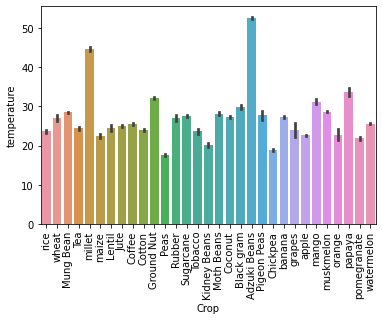

In [39]:
sns.barplot(crop_data["Crop"], crop_data["temperature"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'wheat'),
  Text(2, 0, 'Mung Bean'),
  Text(3, 0, 'Tea'),
  Text(4, 0, 'millet'),
  Text(5, 0, 'maize'),
  Text(6, 0, 'Lentil'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Coffee'),
  Text(9, 0, 'Cotton'),
  Text(10, 0, 'Ground Nut'),
  Text(11, 0, 'Peas'),
  Text(12, 0, 'Rubber'),
  Text(13, 0, 'Sugarcane'),
  Text(14, 0, 'Tobacco'),
  Text(15, 0, 'Kidney Beans'),
  Text(16, 0, 'Moth Beans'),
  Text(17, 0, 'Coconut'),
  Text(18, 0, 'Black gram'),
  Text(19, 0, 'Adzuki Beans'),
  Text(20, 0, 'Pigeon Peas'),
  Text(21, 0, 'Chickpea'),
  Text(22, 0, 'banana'),
  Text(23, 0, 'grapes'),
  Text(24, 0, 'apple'),
  Text(25, 0, 'mango'),
  Text(26, 0, 'muskmelon'),
  Text(27, 0, 'orange'),
  Text(28, 0, 'papaya'),
  Text(29, 0, 'pomegranate'),
  Text(30, 0, 'watermelon')])

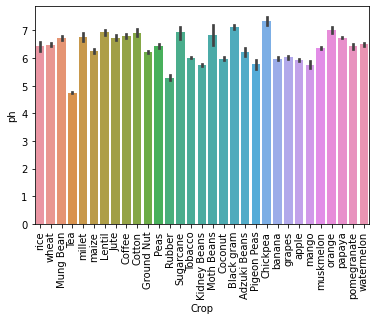

In [40]:
sns.barplot(crop_data["Crop"], crop_data["ph"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'wheat'),
  Text(2, 0, 'Mung Bean'),
  Text(3, 0, 'Tea'),
  Text(4, 0, 'millet'),
  Text(5, 0, 'maize'),
  Text(6, 0, 'Lentil'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Coffee'),
  Text(9, 0, 'Cotton'),
  Text(10, 0, 'Ground Nut'),
  Text(11, 0, 'Peas'),
  Text(12, 0, 'Rubber'),
  Text(13, 0, 'Sugarcane'),
  Text(14, 0, 'Tobacco'),
  Text(15, 0, 'Kidney Beans'),
  Text(16, 0, 'Moth Beans'),
  Text(17, 0, 'Coconut'),
  Text(18, 0, 'Black gram'),
  Text(19, 0, 'Adzuki Beans'),
  Text(20, 0, 'Pigeon Peas'),
  Text(21, 0, 'Chickpea'),
  Text(22, 0, 'banana'),
  Text(23, 0, 'grapes'),
  Text(24, 0, 'apple'),
  Text(25, 0, 'mango'),
  Text(26, 0, 'muskmelon'),
  Text(27, 0, 'orange'),
  Text(28, 0, 'papaya'),
  Text(29, 0, 'pomegranate'),
  Text(30, 0, 'watermelon')])

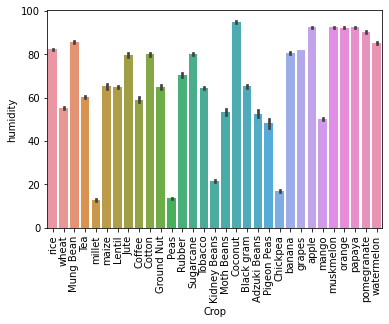

In [41]:
sns.barplot(crop_data["Crop"],crop_data["humidity"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'wheat'),
  Text(2, 0, 'Mung Bean'),
  Text(3, 0, 'Tea'),
  Text(4, 0, 'millet'),
  Text(5, 0, 'maize'),
  Text(6, 0, 'Lentil'),
  Text(7, 0, 'Jute'),
  Text(8, 0, 'Coffee'),
  Text(9, 0, 'Cotton'),
  Text(10, 0, 'Ground Nut'),
  Text(11, 0, 'Peas'),
  Text(12, 0, 'Rubber'),
  Text(13, 0, 'Sugarcane'),
  Text(14, 0, 'Tobacco'),
  Text(15, 0, 'Kidney Beans'),
  Text(16, 0, 'Moth Beans'),
  Text(17, 0, 'Coconut'),
  Text(18, 0, 'Black gram'),
  Text(19, 0, 'Adzuki Beans'),
  Text(20, 0, 'Pigeon Peas'),
  Text(21, 0, 'Chickpea'),
  Text(22, 0, 'banana'),
  Text(23, 0, 'grapes'),
  Text(24, 0, 'apple'),
  Text(25, 0, 'mango'),
  Text(26, 0, 'muskmelon'),
  Text(27, 0, 'orange'),
  Text(28, 0, 'papaya'),
  Text(29, 0, 'pomegranate'),
  Text(30, 0, 'watermelon')])

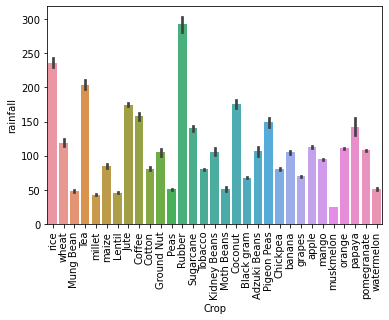

In [42]:
sns.barplot(crop_data["Crop"], crop_data["rainfall"])
plt.xticks(rotation = 90)

In [43]:
crop_data.corr()

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

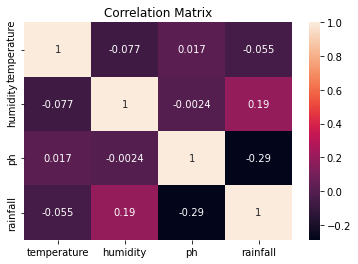

In [44]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [45]:
# Shuffling data to remove order effects

# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()


,temperature,humidity,ph,rainfall,Crop
1141,16.912919,13.881680,5.959978,54.026676,Peas
2262,27.486130,76.112398,6.212369,109.276885,banana
1964,53.751483,61.805135,5.410117,130.090866,Adzuki Beans
1456,19.978657,63.458462,5.944788,84.685380,Tobacco
142,28.721646,59.375796,6.743792,121.484053,wheat


In [46]:
# Selection of Feature and Target variables.

x = df[['temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [47]:
# Encoding target variable 

y = pd.get_dummies(target)
y

,Adzuki Beans,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,...,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1964,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1725,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (2325, 4)
x_test : (775, 4)
y_train : (2325, 31)
y_test : (775, 31)


In [49]:
# Importing necessary libraries for multi-output classification

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Training

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [51]:
# Predicting test results 

forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [52]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.8529032258064516


In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.84946237, 0.8516129 , 0.88602151, 0.8344086 , 0.85376344])

In [54]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

85.51

In [55]:
c1 = (score.std()*100)
c1

1.6911486667817204

In [56]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 85.51%
Standard Deviation : 1.69%


In [57]:
# Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [58]:
# Predicting test results 

decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [59]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.8309677419354838


0.8309677419354838

**Cross-validation**

In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.82882883, 0.86144578, 0.79216867, 0.88855422, 0.80722892,
       0.8253012 , 0.81024096])

In [61]:
b2 = "{:.2f}".format(score.mean()*100)
b2 = float(b2)
b2

83.05

In [62]:
c2 = (score.std()*100)
c2

3.1119598738808025

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
model = MultiOutputClassifier(gb_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier(), n_jobs=-1)

In [64]:
grad_pred = model.predict(x_test)
grad_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test,grad_pred)
print('Accuracy score:', accuracy_score(y_test,grad_pred))
a3

Accuracy score: 0.8412903225806452


0.8412903225806452

**Cross-validation**

In [66]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.82882883, 0.86144578, 0.79216867, 0.88855422, 0.80722892,
       0.8253012 , 0.81024096])

In [67]:
b3 = "{:.2f}".format(score.mean()*100)
b3 = float(b3)
b3

83.05

In [68]:
c3 = (score.std()*100)
c3

3.1119598738808025

In [69]:
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'Gradient Boosting'],
        'Accuracy':[b1, b2, b3],
        'Standard Deviation':[c1,c2,c3]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data)
 
# print the data
df


,Algorithms,Accuracy,Standard Deviation
0,Random Forest,85.51,1.691149
1,Decision-tree,83.05,3.111960
2,Gradient Boosting,83.05,3.111960


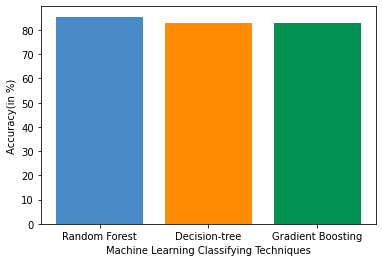

In [70]:
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','Gradient Boosting']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

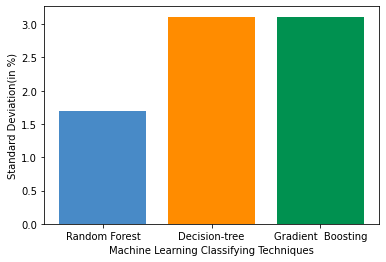

In [71]:
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','Gradient  Boosting']
Accuracy = [c1, c2, c3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color= ['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

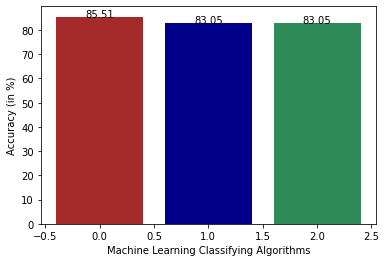

In [72]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Random Forest", "Decision tree", "KNN"]
    y = [b1,b2,b3]


    x_pos = np.arange(len(y))

    # Create bars with different colors
    plt.bar(x_pos, y, color= ['#A52A2A','#00008B','#2E8B57'])
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Machine Learning Classifying Algorithms")
    plt.ylabel("Accuracy (in %)")
      
    # visualizing the plot
    plt.show()

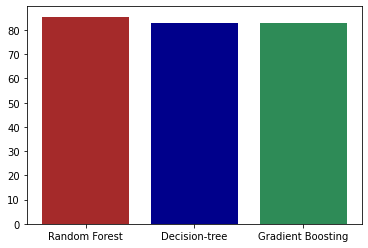

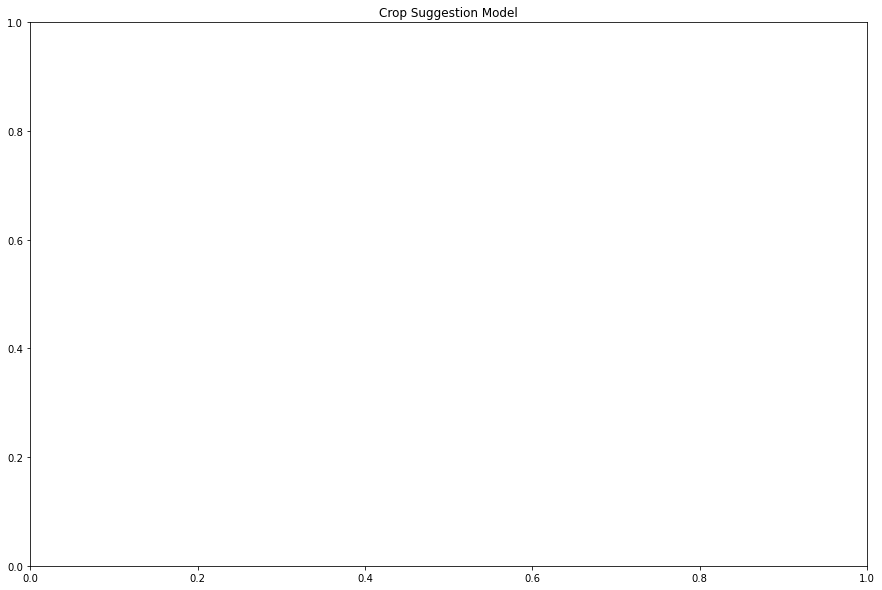

In [73]:
plt.bar(df['Algorithms'], df['Accuracy'], color = ['#A52A2A','#00008B','#2E8B57'])
fig = plt.figure(figsize =(15, 10))
plt.title('Crop Suggestion Model')
 
# Show Plot
plt.show()


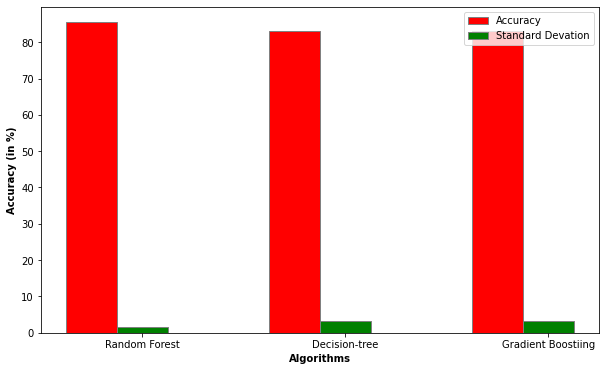

In [74]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Algorithms = ['Random Forest', 'Decision-tree', 'Gradient Boostiing']
Accuracy = [b1, b2, b3]
Standard_Deviation = [c1,c2,c3]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='red', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='green', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show()

In [75]:
# loading dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# EDA & visualisation-Crop_yield_capstone

In [76]:
# loading dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [77]:
# shape of dataset(rows x columns)

crop_data.shape

(246091, 7)

In [78]:
# names of columns in dataset

crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [79]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [80]:
# viewing unique crops available in the dataset

print (crop_data['Crop'].unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [81]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [82]:
# checking missing values of the dataset in each column

crop_data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [83]:
# dropping missing values from dataset

crop_data=crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [84]:
# again checking any missing value

crop_data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [85]:
 # displaying States names present in the dataset
    
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [86]:
# Adding a new column Yield which indicate production per unit Area

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15352/927335300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


**Visualising the dataset**

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

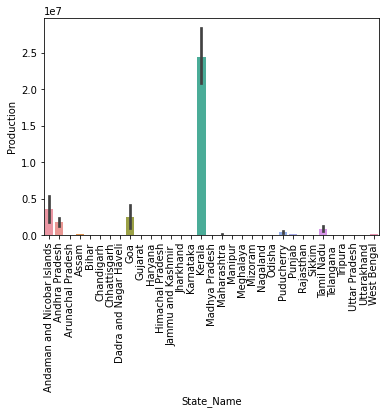

In [87]:
sns.barplot(crop_data["State_Name"], crop_data["Production"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

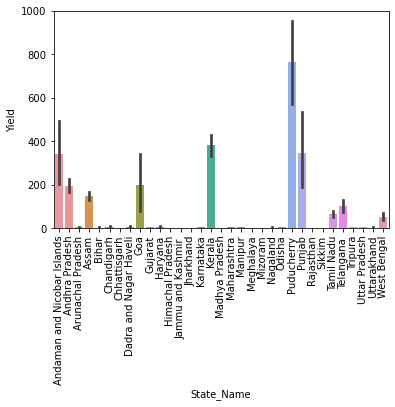

In [88]:
sns.barplot(crop_data["State_Name"], crop_data["Yield"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

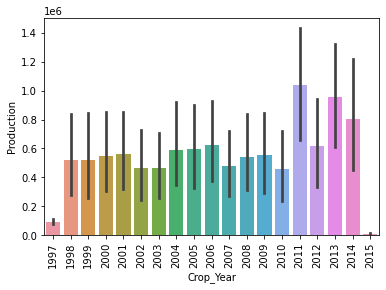

In [89]:
sns.barplot(crop_data["Crop_Year"], crop_data["Production"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

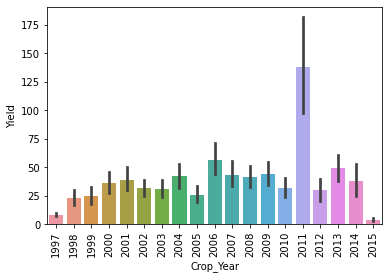

In [90]:
sns.barplot(crop_data["Crop_Year"], crop_data["Yield"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

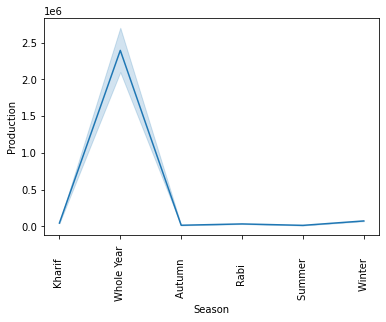

In [91]:
sns.lineplot(crop_data["Season"], crop_data["Production"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

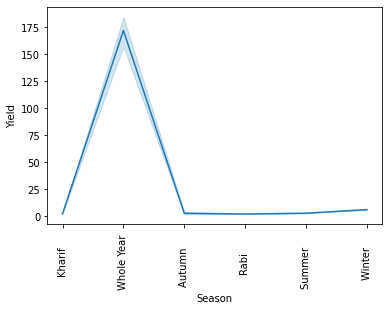

In [92]:
sns.lineplot(crop_data["Season"], crop_data["Yield"])
plt.xticks(rotation = 90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Other Kharif pulses'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Banana'),
  Text(4, 0, 'Cashewnut'),
  Text(5, 0, 'Coconut '),
  Text(6, 0, 'Dry ginger'),
  Text(7, 0, 'Sugarcane'),
  Text(8, 0, 'Sweet potato'),
  Text(9, 0, 'Tapioca'),
  Text(10, 0, 'Black peppe

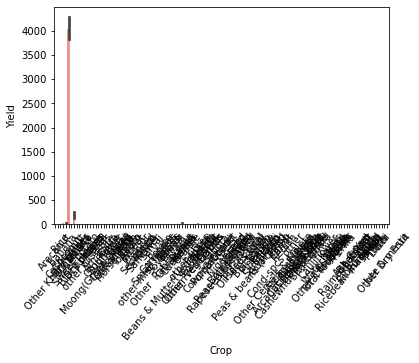

In [93]:
sns.barplot(crop_data["Crop"], crop_data["Yield"])
plt.xticks(rotation = 50)

In [ ]:
sns.jointplot("Area","Production",data=crop_data,kind="reg")
plt.xticks(rotation=90)

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


**Conclusions obtained from the dataset:**

**1.Kerala is largest producer of crop in India.**

**2.Production per unit area(Yield) of Puducherry is maximum.**

**3.In the year 2011, crop yield was maximum.**

**Analyzing each type of Crop**

**1.RICE**

In [ ]:
rice_data=crop_data[crop_data["Crop"]=="Rice"]
rice_data

In [ ]:
rice_data.shape

In [ ]:
sns.barplot("Season","Yield",data=rice_data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot("State_Name","Yield",data=rice_data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot("Crop_Year","Production",data=rice_data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot("Crop_Year","Yield",data=rice_data)
plt.xticks(rotation=90)

In [ ]:
sns.jointplot("Area","Production",data=rice_data,kind="reg")
plt.xticks(rotation=90)

**Observations:**

**1.Rice yield is maximum in Rabi season.**

**2.Rice yield is maximum in Chandigarh.**

**3.Rice yield has been growing a little from the year 2009 to 2014.**

**WHEAT**

In [ ]:
wheat_data=crop_data[crop_data["Crop"]=="Wheat"]
wheat_data

In [ ]:
sns.barplot("Season","Yield",data=wheat_data)

In [ ]:
sns.barplot("State_Name","Production",data=wheat_data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot("Crop_Year","Yield",data=wheat_data)
plt.xticks(rotation=90)


In [ ]:
sns.jointplot("Area","Production",data=wheat_data,kind="reg")
plt.xticks(rotation=90)

**Observations:**

**1.Wheat yield is maximum in Rabi season.**

**2.Wheat yield is maximum in Punjab.**

**3.Wheat yield has been growing a little from the year 2005 to 2012 and after that it is decreasing continuosly.**

**URAD**

In [ ]:
urad_data=crop_data[crop_data["Crop"]=="Urad"]
urad_data

In [ ]:
sns.barplot("Season","Yield",data=urad_data)

In [ ]:
sns.barplot("State_Name","Production",data=urad_data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot("Crop_Year","Yield",data=urad_data)
plt.xticks(rotation=90)

In [ ]:
sns.jointplot("Area","Production",data=urad_data,kind="reg")
plt.xticks(rotation=90)

**Observations:**

**1.Urad yield is produced whole year.**

**2.Urad is highly produecd in Andhra Pradesh.**

**3.Urad has its minimum production in the year 2015.**